<a href="https://colab.research.google.com/github/allanbraquiel/Notebooks/blob/master/Detec%C3%A7%C3%A3o_de_C%C3%A2ncer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Prevendo ocorrência de câncer

A	rotina	de	exame da	mama	permite	que	a	doença	seja diagnosticada	e	tratada	antes	de causar	sintomas	perceptíveis.	O	processo	de	detecção precoce envolve	a	análise	de	nódulos	ou	massas anormais do	tecido	 da	mama.


Se	 um	 nódulo for	 encontrado,	 uma	 biópsia	 de	 aspiração	 com agulha	 fina	 é	 realizada,	 que	 utiliza	 uma	 agulha	 oca	 para	 extrair	 uma pequena	 amostra	 de células.	Um	clínico,	em	seguida,	examina	as células	sob	um	microscópio	para	determinar	se	a massa	 é	 provável	 que	 seja	 maligna	 ou	 benigna.	 

Se	 a	 aprendizagem	 de	 máquina	 puder automatizar	a	identificação	de	células	cancerígenas,	isso	seria	uma conquista importante	para	o sistema	de	saúde.	

Os	processos	automatizados	permitem melhorar	a	eficiência	do	processo	de detecção,	 permitindo	 que	 os	 médicos	 possam diagnosticar	 o	 problema, avaliar	 o	 gasto necessário	para	resolver	e	ainda	definir	o	tempo	necessário	para	o tratamento	da	doença.	

Um sistema	 de	 rastreamento automatizado	 também	 pode	 proporcionar	 uma	 maior	 precisão	 de detecção	através da	remoção	do	componente	humano, inerentemente	subjetivo, do	processo.

Iremos	investigar	a	utilidade	da	aprendizagem	de	máquina	para	detectar	o	câncer,	aplicando	os algoritmos	de	classificação	DecisionTreeClassifier, KNN	e MLP Classifier para	medições	de células	provenientes	de	biópsias	de	mulheres com	nódulos	mamários anormais.

Usaremos	dados	reais,	fornecidos	pelo	repositório	de	Machine	Learning	da UCI,	neste	link:
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Informações dos atributos:

1) **id** - ID número

2) **diagnosis** - Diagnóstico (M = maligno, B = benigno)

Dez características de valor real são calculadas para cada núcleo celular:

a) **radius** - raio (média das distâncias do centro aos pontos no perímetro)

b) **texture** - textura (desvio padrão dos valores da escala de cinza)

c) **perimeter** - perímetro

d) **area** - área

e) **smoothness** - suavidade (variação local nos comprimentos dos raios)

f) **compactness** - compacidade (perímetro ^ 2 / área - 1,0)

g) **concavity** - concavidade (severidade das porções côncavas do contorno)

h ) **concave points** - pontos côncavos (número de porções côncavas do contorno)

i) **symmetry** -  simetria

j) **fractal dimension** - dimensão fractal ("aproximação da linha costeira" - 1)


# Explorando os dados

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("/content/drive/My Drive/Colab_Files/bc_data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Verificando a porcetagem da distribuição dos resultados benignos(B) e malignos(M)

In [6]:
df.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

Alterando o tipo da variável de diagnóstico para categórico

In [7]:
df.diagnosis = df.diagnosis.astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 569 non-null    int64   
 1   diagnosis          569 non-null    category
 2   radius_mean        569 non-null    float64 
 3   texture_mean       569 non-null    float64 
 4   perimeter_mean     569 non-null    float64 
 5   area_mean          569 non-null    float64 
 6   smoothness_mean    569 non-null    float64 
 7   compactness_mean   569 non-null    float64 
 8   concavity_mean     569 non-null    float64 
 9   points_mean        569 non-null    float64 
 10  symmetry_mean      569 non-null    float64 
 11  dimension_mean     569 non-null    float64 
 12  radius_se          569 non-null    float64 
 13  texture_se         569 non-null    float64 
 14  perimeter_se       569 non-null    float64 
 15  area_se            569 non-null    float64 
 16  smoothne

In [9]:
df[["radius_mean", "area_mean", "smoothness_mean"]].describe()

,radius_mean,area_mean,smoothness_mean
count,569.000000,569.000000,569.000000
mean,14.127292,654.889104,0.096360
std,3.524049,351.914129,0.014064
min,6.981000,143.500000,0.052630
25%,11.700000,420.300000,0.086370
50%,13.370000,551.100000,0.095870
75%,15.780000,782.700000,0.105300
max,28.110000,2501.000000,0.163400


Este gráfico pode mostrar o relacionamento entre todas as variáveis, o que nos ajuda a definir quais serão utilizadas para a criação do modelo, onde os valores mais próximo de 1 refletem uma forte correlação positiva e valores próximos de -1 mostram uma forte correlação negativa e os próximos de 0 refletem nenhuma correlação.

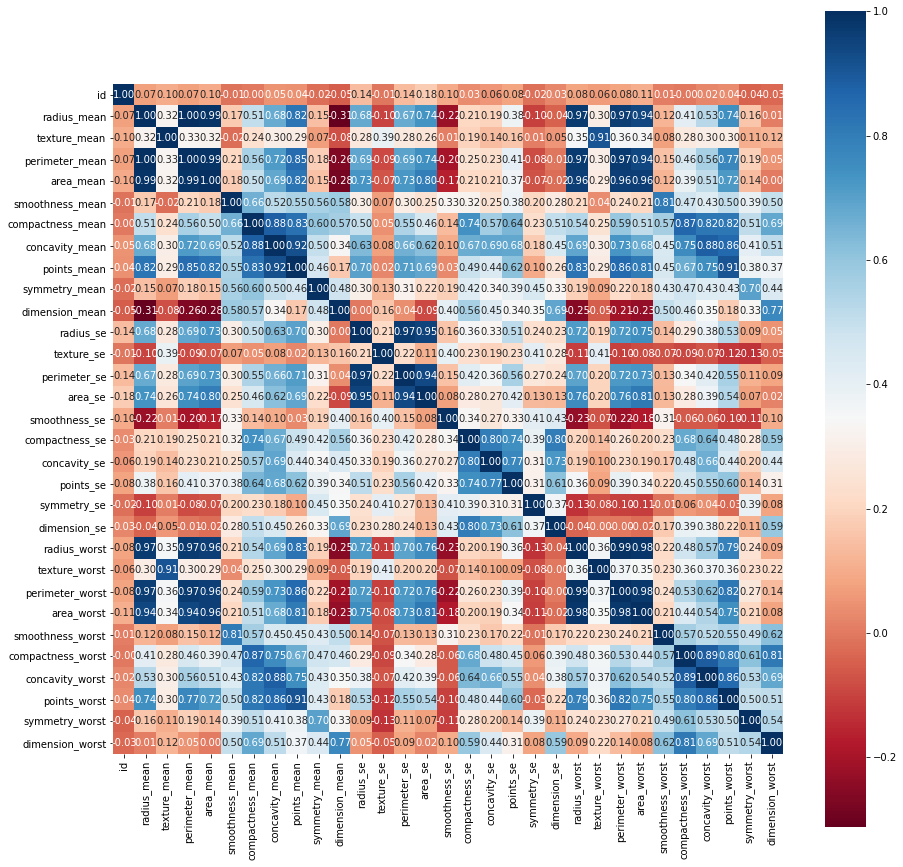

In [11]:
df_correlacao = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df_correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

# Separando os dados

Agora para o treinamento do modelo iremos excluir a variável id pois ela pode influnciar no modelo e levar a resultados incorretos, tendo em vista que esta variável é somente uma identificação do registro. Outra ação que tomaremos agora será de separar as variáveis preditivas (features) do resultado (target).

In [17]:
x_data = df.drop(["id", "diagnosis"], axis=1)
y_data = df["diagnosis"]

In [18]:
x_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [19]:
y_data.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#Normalizando os dados

Analisando os dados, verificmaos que as variáveis se encontram em diversas escalas diferentes, portanto é necessário a normalização de todas as colunas para o treinamento do modelo.

In [20]:
X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [21]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.252686,0.090632,0.242278,0.135992,0.452920,0.154684,0.093416,0.183897,0.454040,0.201980,0.045084,0.067495,0.043019,0.019851,0.215250,0.071710,0.042500,0.235082,0.159819,0.046750,0.198150,0.096482,0.182081,0.089437,0.444628,0.096351,0.099201,0.322715,0.248768,0.083104
1,0.171281,0.312479,0.176145,0.086066,0.399476,0.292375,0.149649,0.131312,0.435354,0.314869,0.122759,0.184936,0.125948,0.037912,0.195703,0.252035,0.084697,0.258572,0.382141,0.083717,0.140519,0.291045,0.138802,0.058887,0.331044,0.217530,0.153035,0.272371,0.271043,0.136626
2,0.192106,0.240785,0.187478,0.097434,0.497156,0.179928,0.071368,0.123260,0.330303,0.283067,0.030853,0.226927,0.027564,0.012585,0.117109,0.053347,0.026667,0.141750,0.130832,0.045023,0.159374,0.384328,0.147019,0.070340,0.434062,0.117307,0.085224,0.255361,0.282476,0.155910
3,0.203464,0.124450,0.201852,0.102354,0.575697,0.289001,0.108599,0.238370,0.359091,0.226622,0.082165,0.217203,0.051548,0.036474,0.324880,0.245802,0.055227,0.372230,0.111414,0.088001,0.141942,0.099947,0.130086,0.061148,0.432741,0.150294,0.069241,0.295911,0.105855,0.083956
4,0.388518,0.118363,0.372193,0.241060,0.243748,0.153242,0.079499,0.132058,0.333838,0.115417,0.024190,0.011559,0.027376,0.020392,0.112146,0.094617,0.039167,0.173423,0.120842,0.030133,0.294201,0.098881,0.269386,0.155795,0.273592,0.142048,0.108786,0.281031,0.181747,0.082776


Separando os dados de treino e teste

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3, random_state=42) 

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (398, 30)
x test:  (171, 30)
y train:  (398,)
y test:  (171,)


# Importância da Features

O conjunto de dados possui muitas colunas e possivelmente nem todas elas contribuem de forma significativa para o treinamento do modelo, dessa forma iremos usar o algoritmo de Árvore de decisão para tentar identificar quais as variáveis preditoras tem maior relevância para o modelo.

In [23]:
from sklearn import tree
arvore = tree.DecisionTreeClassifier()

In [24]:
arvore.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
result = arvore.predict(x_test)

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

[[103   7]
 [  5  56]]
              precision    recall  f1-score   support

           B       0.95      0.94      0.94       110
           M       0.89      0.92      0.90        61

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



A biblioteca feature_importances_ calcula qual foi a relevância que cada variável teve para a obtenção do resultado

In [27]:
feature_imp = pd.Series(arvore.feature_importances_, index=X.columns)

In [28]:
feature_imp.sort_values(ascending=False)

points_mean          0.671648
radius_worst         0.082394
texture_worst        0.048329
area_worst           0.038416
texture_mean         0.038238
area_se              0.037875
dimension_se         0.020666
texture_se           0.018674
symmetry_se          0.017785
points_worst         0.016192
smoothness_worst     0.009782
area_mean            0.000000
dimension_mean       0.000000
smoothness_mean      0.000000
compactness_mean     0.000000
concavity_mean       0.000000
perimeter_mean       0.000000
symmetry_mean        0.000000
dimension_worst      0.000000
smoothness_se        0.000000
radius_se            0.000000
perimeter_se         0.000000
symmetry_worst       0.000000
compactness_se       0.000000
concavity_se         0.000000
points_se            0.000000
perimeter_worst      0.000000
compactness_worst    0.000000
concavity_worst      0.000000
radius_mean          0.000000
dtype: float64

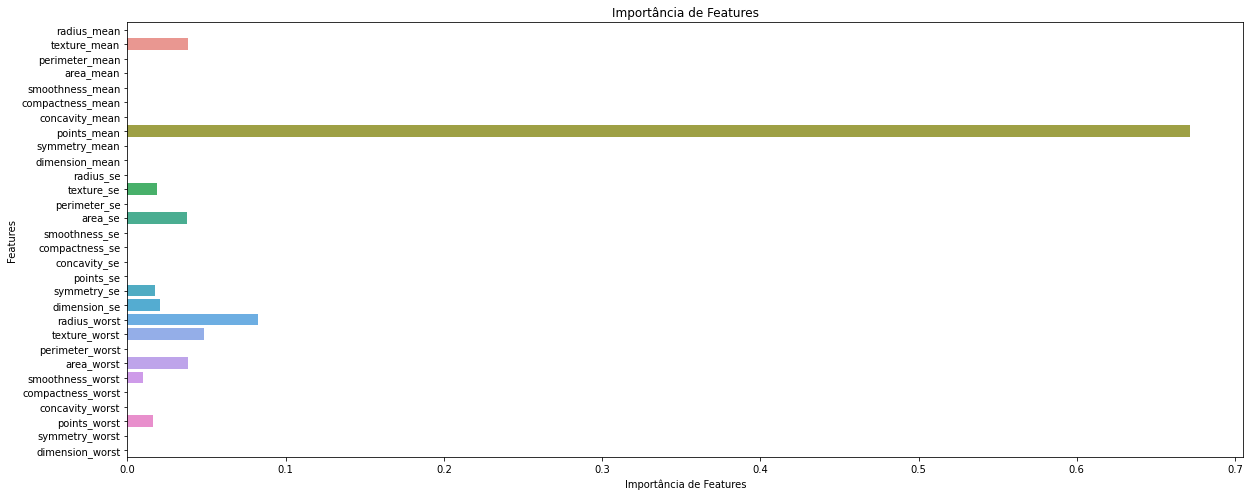

In [29]:
plt.figure( figsize=(20, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Importância de Features")
plt.ylabel("Features")
plt.title("Importância de Features")

plt.show()

Agora que já identificamos quais variáveis tem mais relevância para obter o resultado, iremos eliminar as colunas menos importantes para a criação do modelo criando um novo dataset somente com as variáveis mais importantes.

In [30]:
X2 = X[["points_mean", "radius_worst", "texture_worst", "points_worst", "area_se", "dimension_se", "symmetry_se"]]

Verificando a correlação com as features que restaram

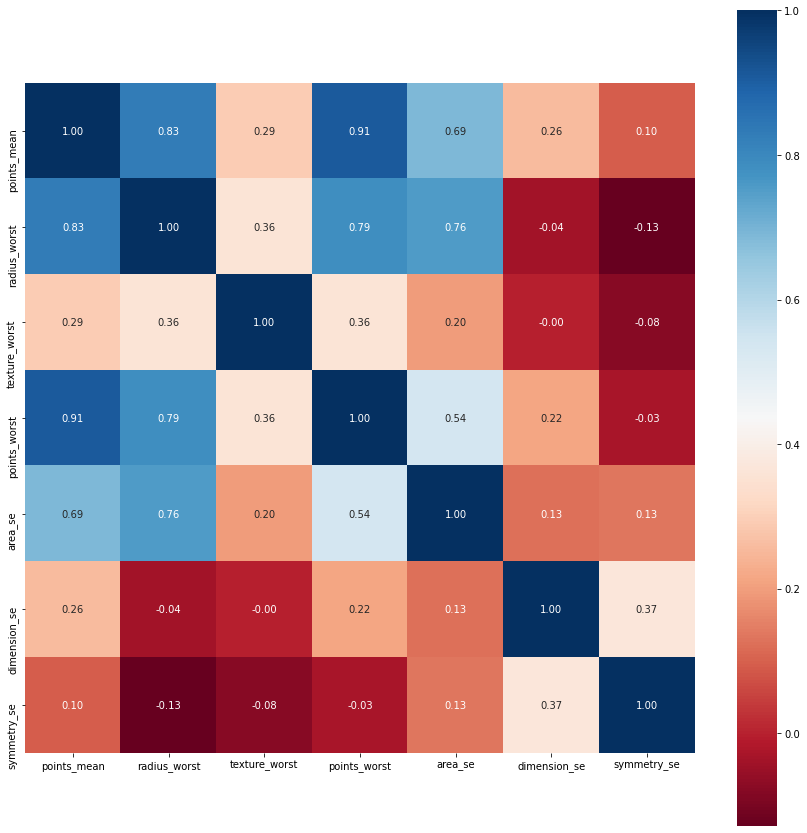

In [31]:
df_correlacao = X2.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df_correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Agora que selecionamos as features mais importantes, iremo treinar o modelo novamente

# DecisionTreeClassifier

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X2, y_data, test_size=0.3, random_state=42) 

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (398, 7)
x test:  (171, 7)
y train:  (398,)
y test:  (171,)


In [33]:
arvore.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
result = arvore.predict(x_test)

In [35]:
print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

[[103   7]
 [  6  55]]
              precision    recall  f1-score   support

           B       0.94      0.94      0.94       110
           M       0.89      0.90      0.89        61

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



Podemo ver que com este algoritmo alcaçamos uma precisão de 94% para os casos benignos e 89% para os malignos e uma aacurácia de 92%, sendo que houveram 7 falsos positivos e 6 falsos negativos.

# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17, p=12)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=12,
                     weights='uniform')

In [37]:
from sklearn.metrics import classification_report

predictions = knn.predict(x_test)
print("Score: ", knn.score(x_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Score:  0.9649122807017544
[[108   2]
 [  4  57]]
              precision    recall  f1-score   support

           B       0.96      0.98      0.97       110
           M       0.97      0.93      0.95        61

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Este algoritmo obteve um resultado um pouco melhor se comparado ao DecisionTreeClassifier, alcançando uma precisão e acurácia de 96%, onde houveram apenas 2 falsos positivos e 4 falsos negativos.

# MLP Classifier

In [38]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [39]:
predictions = mlp.predict(x_test)
print("Score: ", mlp.score(x_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Score:  0.9824561403508771
[[109   1]
 [  2  59]]
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       110
           M       0.98      0.97      0.98        61

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Este algoritmo obteve o melhor resultado. O MLP Classifier obteve uma precisão e uma acurácia de 98 % e houve apenas 1 falso verdadeiro e 2 falsos negativos.

# Analisando os resultados

Lendo a Confusion Matrix (Perspectva de ter ou não a doença):

**Verdadeiro Negativo**: Nosso modelo previu que a pessoa NÃO tinha a doença e os dados mostraram que realmentente não tinha a doença

**Falso Positivo**: Nosso modelo previu que a pessoa tinha a doença e os dados mostraram que NÃO, a pessoa não tinhja a doença

**Falso Negativo**: Nosso modelo previu que a pessoa NÃO tinha a doença e os dados mostraram que SIM, a pessoa tinha a doença

**Verdadeiro Positivo**: Nosso modelo previu que a pessoa tinha a doença e os dados mostraram que SIM, a pessoa tinha a doença

Falso Positivo - Erro Tipo I

Falso Negativo - Erro Tipo II

Taxa de acerto do Modelo: 98% (acertou 98 em 100)